# (P P2. Clasificación)         
                                                                                                       
                                                                            Fernando Ariel Lozano Castillo
Para empezar el proyecto veamos las variables de la base de datos y veamos cual es la variable de salida.

In [27]:
import warnings
warnings.filterwarnings('ignore')

## Índice de Jupyter
<a id='indi' ></a>

[1.- Exploracion](#exp) <br>
[2.- Solucion de errores](#sol) <br>
[3.- Seleccion de caracteristicas](#sele) <br>
[4.- Regresión logística multinomial](#regre) <br>
[5.- LDA](#ldas)<br>
[6.-Arbol de decision](#tree) <br>
[7.-Modelo de bagging, random forest o boosting](#extra) <br>
[8.-Modelo con datos de prueba](#probe)<br>
[Conclusión ](#concu) <br>

******


## 1.- Exploración  
<a id='exp'></a>  
[Regreso al índice ](#indi) 

Primero lo que haremos es exportar la base de datos `train` de la pagina , despues 
checamos sus medidas con `shape`, luego imprimimos las primeras 5 filas con `head` y con `dftypes` ver que tipos de datos tenemos.
Además de imprimir el `value_counts` de Cabin a ver que tiene y por si acaso con `is null` checar si existen huecos en la base.

In [33]:
# Importa la librería pandas
import pandas as pd
# Lee el archivo
df = pd.read_csv("train.csv")

# Imprimir el tamaño de la base de datos
print("Tamaño de la base : ", df.shape, "\n")


display(df.head(5))
# Imprime el tipo de datos con que se cuenta
print(df.dtypes)
print(" ")
print(" ")
print(" ")
print(df.Transported.value_counts())
print(df.Cabin.value_counts(), "\n\n")

# Verificar cantidad de respuestas
print("Cantidad de NULLS por variable")
print(df.isnull().sum())

Tamaño de la base :  (8693, 14) 



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
 
 
 
Transported
True     4378
False    4315
Name: count, dtype: int64
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64 


Cantidad de NULLS por variable
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


## 2.- Solución  
<a id='sol'></a>  
[Regreso al índice ](#indi) 

## Solución de errores y manejo de valores nulos

### Eliminación de la columna `Name`
Para simplificar el procesamiento de datos, eliminaré la columna `Name`. De lo contrario, tendría que optar por estrategias más complejas, como extraer los apellidos y generar variables dummy o crear una nueva columna basada en la frecuencia de los apellidos, una idea sugerida por GPT.

### Manejo de valores nulos
Para tratar los valores faltantes en el conjunto de datos, utilizaré las siguientes estrategias:

- **Variables cuantitativas**: Rellenaré los valores nulos con la **media** de la columna.
- **Variables cualitativas**: Rellenaré los valores nulos con la **moda** de la columna.

A continuación, se muestra el código que implementa esta estrategia, junto con su explicación:


- Reemplazar valores faltantes en variables cuantitativas con la media
df[quantitative_columns] = df[quantitative_columns].apply(lambda x: x.fillna(x.mean()))
Este código recorre cada columna de la lista quantitative_columns y reemplaza los valores nulos con la media de la misma.

- Reemplazar valores faltantes en variables cualitativas con la moda
df[qualitative_columns] = df[qualitative_columns].apply(lambda x: x.fillna(x.mode()[0]))
Para cada columna en qualitative_columns, se calcula la moda (valor más frecuente) y se reemplazan los valores nulos con este.

- Verificar los valores faltantes después del reemplazo
missing_values = df.isnull().sum()
print("Valores faltantes por columna después de la limpieza:")
print(missing_values)

In [36]:
# Reemplazar valores faltantes en variables cuantitativas con la media
quantitative_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df[quantitative_columns] = df[quantitative_columns].apply(lambda x: x.fillna(x.mean()))

# Reemplazar valores faltantes en variables cualitativas con la moda
qualitative_columns = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]
df[qualitative_columns] = df[qualitative_columns].apply(lambda x: x.fillna(x.mode()[0]))


missing_values = df.isnull().sum()
print("Valores faltantes por columna después de la limpieza:")
print(missing_values)


Valores faltantes por columna después de la limpieza:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [38]:
# Eliminar la columna 'Name'
df.drop(columns=['Name'], inplace=True)

# Verificar que se eliminaron los nulos y la columna Name
print("NULLS después de limpieza:")
print(df.isnull().sum())
print("\nVariables restantes:")
display(df.head(5))

print("Tamaño de la base : ", df.shape, "\n")

NULLS después de limpieza:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Variables restantes:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


Tamaño de la base :  (8693, 13) 



## Creación de variables dummies

Después de limpiar los valores nulos y eliminar la variable `Name`, el siguiente paso es convertir las variables categóricas en variables dummies para que puedan ser utilizadas en modelos de Machine Learning.

- Convertir variables categóricas a dummies
dHomePlanet = pd.get_dummies(df.HomePlanet, drop_first=True, prefix="HomePlanet")

Convierte la variable categórica HomePlanet en variables dummies (variables binarias 0 o 1).
El parámetro drop_first=True elimina la primera categoría para evitar colinealidad en modelos estadísticos.
El prefix="HomePlanet" agrega un prefijo a las nuevas columnas generadas.

- Procesar la columna Cabin dividiéndola en Deck, Num y Side
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
La columna Cabin tiene valores en formato "Deck/Num/Side", por lo que la dividimos en tres nuevas columnas:
- Deck: Representa la cubierta del barco.
- Num: Número de la cabina.
- Side: Lado del barco (P para puerto, S para estribor).

- Convertir Num a numérico (algunas cabinas pueden tener valores NaN)
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')
Convierte Num en un valor numérico para facilitar cálculos y modelos de aprendizaje automático.
El parámetro errors='coerce' convierte valores no numéricos en NaN en caso de error.

- Convertir Side en dummies
dSide = pd.get_dummies(df['Side'], drop_first=True, prefix="Side11")
Crea variables dummies a partir de Side, eliminando una categoría para evitar colinealidad.
El prefijo "Side11" es agregado a las nuevas columnas generadas.




In [41]:
# Convertir variables categóricas a dummies
dHomePlanet = pd.get_dummies(df.HomePlanet, drop_first=True, prefix="HomePlanet")
dCryoSleep = pd.get_dummies(df.CryoSleep, drop_first=True, prefix="CryoSleep")
dDestination = pd.get_dummies(df.Destination, drop_first=True, prefix="Destination")
dVIP = pd.get_dummies(df.VIP, drop_first=True, prefix="VIP")

# Procesar la columna Cabin dividiéndola en Deck, Num y Side
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

# Convertir Num a numérico (algunas cabinas pueden tener valores NaN)
df['Num'] = pd.to_numeric(df['Num'], errors='coerce')

# Convertir Side en dummies
dSide = pd.get_dummies(df['Side'], drop_first=True, prefix="Side11")

# Convertir Deck en dummies
dDeck = pd.get_dummies(df['Deck'], drop_first=True, prefix="deck11")

# Concatenar todas las nuevas variables al dataframe original
df = pd.concat([df, dHomePlanet, dCryoSleep, dDestination, dVIP, dSide, dDeck], axis=1)

# Eliminar las columnas categóricas originales
df.drop(["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Side", "Deck"], axis=1, inplace=True)

print(df.head())

  PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     0001_01  39.0          0.0        0.0           0.0     0.0     0.0   
1     0002_01  24.0        109.0        9.0          25.0   549.0    44.0   
2     0003_01  58.0         43.0     3576.0           0.0  6715.0    49.0   
3     0003_02  33.0          0.0     1283.0         371.0  3329.0   193.0   
4     0004_01  16.0        303.0       70.0         151.0   565.0     2.0   

   Transported  Num  HomePlanet_Europa  ...  Destination_TRAPPIST-1e  \
0        False    0               True  ...                     True   
1         True    0              False  ...                     True   
2        False    0               True  ...                     True   
3        False    0               True  ...                     True   
4         True    1              False  ...                     True   

   VIP_True  Side11_S  deck11_B  deck11_C  deck11_D  deck11_E  deck11_F  \
0     False     False      Tr

Aquí comenzamos transformando las variables categóricas en dummies. En la mayoría de los casos, esto solo implica convertirlas directamente.  

Sin embargo, la variable `Cabin` generaba 6,750 columnas dummies, lo cual no era eficiente. Para evitar esto, opté por dividir `Cabin` en tres nuevas variables:  
- `deck11`: Representa la cubierta del barco.  
- `Num`: Corresponde al número de la cabina.  
- `Side11`: Indica el lado del barco (P para puerto, S para estribor).  

El sufijo `11` lo agregué únicamente para facilitar la identificación de las variables dummies al imprimir el `head` del dataframe.


# Hacer la division
Aqui ya hacemos la division de los datos en train y test 



- df.drop("Transported", axis=1): Crea un nuevo DataFrame X que contiene todas las columnas de df excepto la columna "Transported".
- df["Transported"]: Selecciona la columna "Transported" como la variable objetivo Y.
- train_size=0.8: Indica que el 80% de los datos se utilizarán para el conjunto de entrenamiento y el 20% restante para el conjunto de prueba.
- random_state=42: Fija la semilla del generador de números aleatorios para asegurar que los resultados sean reproducibles.
- stratify=df["Transported"]: Asegura que la división de los datos mantenga la misma proporción de clases en los conjuntos de entrenamiento y prueba.

In [45]:
#Importar función
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Transported", axis=1), df["Transported"],
                                                train_size=0.8, random_state=42, stratify=df["Transported"])
# Imprimir conteo en entrenamiento
print("\nEn entrenamiento: ", Y_train.value_counts())

# Imprimir conteo en prueba
print("\nEn prueba: ", Y_test.value_counts())

#Imprimir conteo en datos originales
print("\nEn datos originales: ", df.Transported.value_counts())


En entrenamiento:  Transported
True     3502
False    3452
Name: count, dtype: int64

En prueba:  Transported
True     876
False    863
Name: count, dtype: int64

En datos originales:  Transported
True     4378
False    4315
Name: count, dtype: int64



## 3.- Seleccion de caracteristicas  
<a id='sele'></a>  
[Regreso al índice](#indi) 


- "selector = SelectKBest(chi2, k=8)" define un selector que:

Usa la prueba de chi-cuadrado (chi2) como criterio.

Elige las 8 mejores características (k=8).


- "X_train_selected = selector.fit_transform(X_train, Y_train)" realiza dos acciones:

fit: Calcula la relación estadística entre cada característica de X_train y las etiquetas Y_train.

transform: Filtra X_train, conservando solo las 8 características seleccionadas.


- "X_test_selected = selector.transform(X_test)" aplica la misma selección (las 8 características ya elegidas) al conjunto de prueba.

No se usa fit aquí para no contaminar la evaluación con información de prueba.


In [110]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
# Selección de características usando chi-cuadrado
selector = SelectKBest(chi2, k=15)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Escalar los datos DESPUÉS de la selección de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)  # Aplicar el mismo escalador

# Obtener las características seleccionadas
selected_features = X_train.columns[selector.get_support(indices=True)]
print("Características seleccionadas:", selected_features)

# Comprobar dimensiones
print(X_train_scaled.shape)  
print(X_test_scaled.shape)  


Características seleccionadas: Index(['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Num', 'HomePlanet_Europa', 'CryoSleep_True', 'Side11_S',
       'deck11_B', 'deck11_C', 'deck11_E', 'deck11_F'],
      dtype='object')
(6954, 15)
(1739, 15)


## 3.- Regresión logística multinomial  
<a id='regre'></a>  
[Regreso al índice](#indi) 

Ahora que ya hicimos los dummies y el split para train y test 
Ahora hagamos la regresión logistica normal, es que la que se pide es multinomial pero son solo 2 clases


In [114]:
# Importar función
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [116]:
modelo_logistico = LogisticRegression(penalty=None, class_weight="balanced", random_state=42, solver='saga', max_iter=1000).fit(X_train_scaled, Y_train)


### Validacion cruzada con K folds luego elejir el mejor 

In [119]:
print(X_train_scaled.shape)  # (n_samples, n_features)
print(X_test_selected.shape)  # (m_samples, n_features)
import matplotlib.pyplot as plt

(6954, 15)
(1739, 15)


Validación cruzada (15 pliegues) - Exactitud por pliegue: [0.80387931 0.79310345 0.78017241 0.79310345 0.79741379 0.7737069
 0.80603448 0.80172414 0.79310345 0.7775378  0.78401728 0.82073434
 0.78185745 0.80777538 0.80777538]

Exactitud media en la validación cruzada: 0.7948
Confusión con umbral 0.5:
[[  7 856]
 [  1 875]]
Exactitud: 0.5072, Sensibilidad: 0.9989, Especificidad: 0.0081



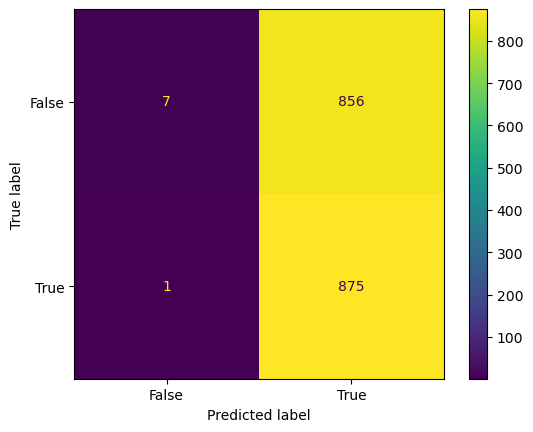

In [121]:
# Realizar validación cruzada con 10 pliegues
cv_scores = cross_val_score(modelo_logistico, X_train_scaled, Y_train, cv=15, scoring='accuracy')

# Imprimir las puntuaciones obtenidas para cada pliegue
print(f"Validación cruzada (15 pliegues) - Exactitud por pliegue: {cv_scores}")

# Calcular la media de la exactitud de todos los pliegues
mean_cv_score = cv_scores.mean()
print(f"\nExactitud media en la validación cruzada: {mean_cv_score:.4f}")





# Importar funciones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import numpy as np

# Generar las probabilidades para el conjunto de prueba
pred_prob = modelo_logistico.predict_proba(X_test_selected)[:, 1]  # Probabilidades para la clase 1

# Definir los umbrales
umbral1 = 0.5


# Hacer predicciones 
pred1 = (pred_prob >= umbral1).astype(int)


# Función para calcular métricas de la matriz de confusión
def calcular_metricas(cm):
    TP = cm[1, 1]  # Verdaderos Positivos
    TN = cm[0, 0]  # Verdaderos Negativos
    FP = cm[0, 1]  # Falsos Positivos
    FN = cm[1, 0]  # Falsos Negativos

    # Exactitud
    exactitud = (TP + TN) / (TP + TN + FP + FN)
    
    # Sensibilidad (Recall)
    sensibilidad = TP / (TP + FN)
    
    # Especificidad
    especificidad = TN / (TN + FP)

    return exactitud, sensibilidad, especificidad

# Para el umbral 0.5
cm1 = confusion_matrix(Y_test, pred1)
cmd(cm1, display_labels=modelo_logistico.classes_).plot(xticks_rotation="horizontal")
exactitud1, sensibilidad1, especificidad1 = calcular_metricas(cm1)
print(f"Confusión con umbral 0.5:\n{cm1}")
print(f"Exactitud: {exactitud1:.4f}, Sensibilidad: {sensibilidad1:.4f}, Especificidad: {especificidad1:.4f}\n")
plt.show()

## 3.- LDA  
<a id='ldas'></a>  
[Regreso al índice](#indi)  


- Se usa StratifiedKFold(n_splits=10, shuffle=True, random_state=42) para dividir los datos en 10 partes equilibradas.

- cross_val_score(lda, X_train_scaled, Y_train, cv=cv, scoring='accuracy') calcula la exactitud en cada pliegue.

- Se obtiene la media de la exactitud con cv_scores.mean().

lda.predict_proba(X_test_scaled)[:, 1] obtiene la probabilidad de pertenecer a la clase 1.
Se establece un umbral de 0.5 para decidir la clasificación:
Si la probabilidad es mayor o igual a 0.5, la predicción es 1.
Si es menor, la predicción es 0.

confusion_matrix(Y_test, pred1) genera la matriz de confusión.
ConfusionMatrixDisplay(cm1, display_labels=lda.classes_).plot(cmap='Blues') la visualiza gráficamente.


Validación cruzada (10 pliegues) - Exactitud por pliegue: [0.77011494 0.75287356 0.75718391 0.78304598 0.8        0.7381295
 0.78705036 0.77553957 0.75971223 0.75395683]

Exactitud media en la validación cruzada: 0.7678

Confusión con umbral 0.5:
[[719 144]
 [271 605]]
Exactitud: 0.7614
Sensibilidad: 0.6906
Especificidad: 0.8331


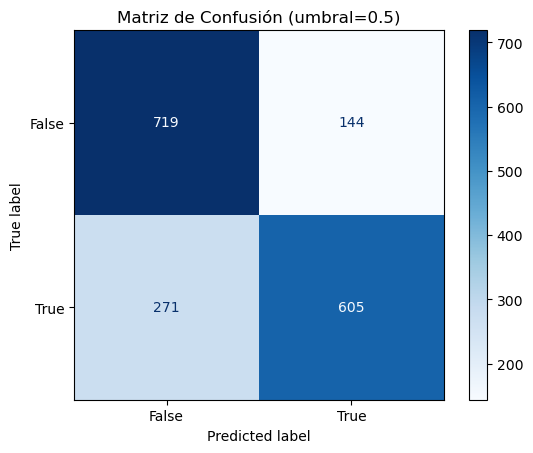

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# 1. Crear y ajustar el modelo LDA
lda = LDA()

# 2. Realizar validación cruzada con K pliegues
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(lda, X_train_scaled, Y_train, cv=cv, scoring='accuracy')

# Imprimir las puntuaciones obtenidas para cada pliegue
print(f"Validación cruzada (10 pliegues) - Exactitud por pliegue: {cv_scores}")
# Calcular la media de la exactitud de todos los pliegues
mean_cv_score = cv_scores.mean()
print(f"\nExactitud media en la validación cruzada: {mean_cv_score:.4f}")

# 3. Obtener probabilidades y predicciones para el conjunto de prueba
pred_prob = lda.fit(X_train_scaled, Y_train).predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase 1
umbral1 = 0.5
pred1 = (pred_prob >= umbral1).astype(int)

# 4. Función para calcular métricas de la matriz de confusión
def calcular_metricas(cm):
    TP = cm[1, 1]  # Verdaderos Positivos
    TN = cm[0, 0]  # Verdaderos Negativos
    FP = cm[0, 1]  # Falsos Positivos
    FN = cm[1, 0]  # Falsos Negativos

    # Exactitud
    exactitud = (TP + TN) / (TP + TN + FP + FN)
    
    # Sensibilidad (Recall)
    sensibilidad = TP / (TP + FN)
    
    # Especificidad
    especificidad = TN / (TN + FP)

    return exactitud, sensibilidad, especificidad

# 5. Para el umbral 0.5
cm1 = confusion_matrix(Y_test, pred1)
ConfusionMatrixDisplay(cm1, display_labels=lda.classes_).plot(cmap='Blues', xticks_rotation='horizontal')
plt.title('Matriz de Confusión (umbral=0.5)')

exactitud1, sensibilidad1, especificidad1 = calcular_metricas(cm1)
print(f"\nConfusión con umbral 0.5:\n{cm1}")
print(f"Exactitud: {exactitud1:.4f}")
print(f"Sensibilidad: {sensibilidad1:.4f}")
print(f"Especificidad: {especificidad1:.4f}")
plt.show()

## 4.- Árbol de decisión  
<a id='tree'></a>  
[Regreso al índice](#indi)  

#### Nota  : Algunos comentarios no estan actualizados dentro de los bloques de programación debido a que iba modificando valores y mandando . Hasta que hice el ultimo y ya no quiero picarle porque si no capaz cambian los valores.


- DTC(max_depth=7) crea un clasificador de árbol de decisión con una profundidad máxima de 7 niveles.

- tree.fit(X_train_scaled, Y_train) entrena el modelo con los datos escalados.

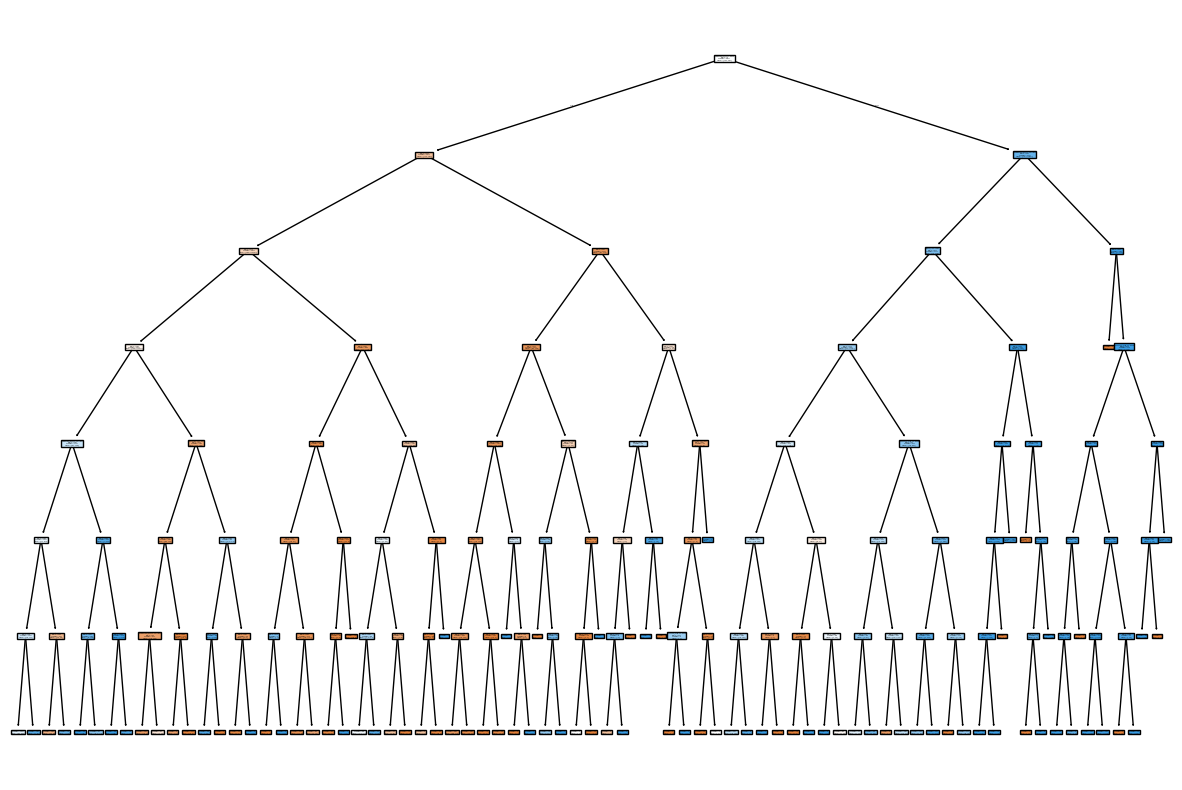

In [127]:
# Importar librería
from sklearn.tree import DecisionTreeClassifier as DTC
# Crear y entrenar modelo
# Crear y entrenar modelo con profundidad máxima limitada
tree = DTC(max_depth=7).fit(X_train_scaled, Y_train)  # Limita la profundidad a 3 niveles

# Función mágica
%matplotlib inline
# Importa plot_tree
from sklearn.tree import plot_tree
# Define el tamaño de la figura
plt.figure(figsize=(15,10))
# Genera la gráfica del árbol de decisión
plot_tree(tree, filled=True, feature_names=X_train.columns);
plt.show()

In [128]:
# Realiza la predicción
yhat0 = tree.predict(X_test_scaled)
# Calcula accuracy
acc0 = accuracy_score(Y_test, yhat0)
# Calcula f1
f10 = f1_score(Y_test, yhat0)# Importa las métricas
from sklearn.metrics import accuracy_score, f1_score
# Realiza la predicción
yhat0 = tree.predict(X_test_scaled)
# Calcula accuracy
acc0 = accuracy_score(Y_test, yhat0)
# Calcula f1
f10 = f1_score(Y_test, yhat0)
# Imprime resultados
print("Accuracy inicial:",acc0)
print("F1-score inicial:",f10)


Accuracy inicial: 0.7832087406555491
F1-score inicial: 0.7991475759190197


## **Optimización y Poda del Árbol de Decisión**  

A continuación, se realizará un proceso de poda del árbol de decisión utilizando el parámetro de complejidad `ccp_alpha`. Para encontrar el valor óptimo de este parámetro, se llevará a cabo una validación cruzada con 3 pliegues (`StratifiedKFold`). Se probarán distintos valores de `ccp_alpha` en un rango definido y se seleccionará el que maximice el **f1-score**.  

Una vez determinado el mejor `ccp_alpha`, se entrenará un árbol de decisión con poda y se visualizará su estructura. La poda permite reducir el tamaño del árbol eliminando ramas innecesarias, lo que ayuda a evitar el sobreajuste y mejora la capacidad de generalización del modelo.  

1. **Validación cruzada y selección del hiperparámetro de poda (`ccp_alpha`)**  
   - Se utiliza `StratifiedKFold(n_splits=3)` para dividir los datos en 3 pliegues estratificados.  
   - `ccp = np.linspace(0.001, 0.2, 250)` genera una secuencia de 250 valores para `ccp_alpha`, el parámetro de complejidad de poda.  
   - Se inicializa `cv_scores = []` para almacenar los valores del **f1-score** en la validación cruzada.  
   - En el bucle `for`, se entrena un modelo de árbol de decisión con cada valor de `ccp_alpha`, y se calcula su desempeño con `cross_val_score`.  
   - Se selecciona el mejor valor de `ccp_alpha` maximizando el **f1-score**.
2. **Entrenamiento del árbol podado**  
   - `DTC(ccp_alpha=alpha).fit(X_train_scaled, Y_train)` crea y entrena un árbol con el mejor valor de `ccp_alpha`, eliminando ramas innecesarias.  
   - La poda ayuda a evitar el sobreajuste (overfitting) y mejora la generalización del modelo.
3. **Visualización del árbol podado**  
   - `plot_tree(pruned_tree, filled=True, feature_names=X_train.columns)` grafica el árbol de decisión resultante con los nodos coloreados para facilitar la interpretación.  
   - `plt.show()` se usa para asegurar que el gráfico se despliegue correctamente.  

4. **Impresión del mejor valor de `ccp_alpha`**  
   - `print("Best alpha:", alpha)` muestra el valor óptimo seleccionado para la poda.  

In [130]:
# Generar objeto de validación cruzada
skf = StratifiedKFold(n_splits=3)
# Generar secuencia de valores
ccp = np.linspace(0.001, 0.2, 250)
# Inicializar variable de salida
cv_scores = []
# Ciclo donde se calcula el f1-score mediante validación cruzada
for alpha in ccp:
  pruned_tree = DTC(ccp_alpha=alpha)
  cv_scores.append(np.mean(cross_val_score(pruned_tree, X_train_scaled, Y_train, cv=skf, scoring='f1')))

In [131]:
# Encontrar el alpha óptimo
alpha = ccp[np.argmax(cv_scores)]
# Imprimir resultados
print("Best alpha:",alpha)

Best alpha: 0.0017991967871485944


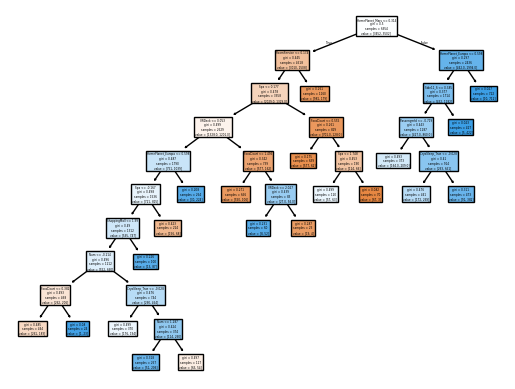

In [133]:
# Generar y entrenar el árbol podado
pruned_tree = DTC(ccp_alpha=alpha).fit(X_train_scaled, Y_train)

# Visualizar árbol

plot_tree(pruned_tree, filled=True, feature_names=X_train.columns)
plt.show()  # Asegurar que el gráfico se muestre correctamente

In [135]:
# Predicciones del nuevo modelo
yhat_p = pruned_tree.predict(X_test_scaled)
# Accuracy
acc_p = accuracy_score(Y_test, yhat_p)
# F-1 score
f1_p = f1_score(Y_test, yhat_p)
# Imprimir resultados
print("Accuracy final:",acc_p)
print("F1-score final:",f1_p)

Accuracy final: 0.7596319723979299
F1-score final: 0.7614155251141552


## 5.- Modelo de  Boosting  
<a id='extra'></a>  
[Regreso al índice](#indi)  

A continuación, se implementará el modelo **Gradient Boosting Classifier (GBC)**, que es un algoritmo de ensamble basado en árboles de decisión. GBC construye secuencialmente modelos débiles y ajusta los errores de predicción mediante técnicas de gradient boosting. Se aplicará validación cruzada para evaluar su rendimiento y posteriormente se analizará su precisión en el conjunto de prueba.  

Se realizarán las siguientes acciones:  
1. **Configuración de validación cruzada** con `StratifiedKFold(n_splits=5)`.  
2. **Entrenamiento y evaluación** del modelo en los datos de prueba.  
3. **Análisis de importancia de características** para interpretar el impacto de cada variable en el modelo.  
4. **Generación de la matriz de confusión** para visualizar el desempeño del clasificador.  
5. **Reporte de clasificación**, mostrando métricas como precisión (`accuracy`) y `F1-score`.



### **Explicación:**

1. **Definición del modelo Gradient Boosting Classifier (GBC)**  
   - `GradientBoostingClassifier(n_estimators=200, random_state=42)`: Se define un modelo GBC con 200 estimadores (árboles de decisión).  
   - GBC ajusta los modelos débiles en secuencia, minimizando los errores de predicción mediante el descenso de gradiente.  

2. **Validación cruzada**  
   - `cross_val_score(gbc, X_train_scaled, Y_train, cv=cv, scoring='accuracy')` ejecuta una validación cruzada con 5 pliegues.  
   - Se obtiene la precisión promedio (`accuracy`) y su desviación estándar para evaluar la estabilidad del modelo.  

3. **Entrenamiento y evaluación en el conjunto de prueba**  
   - `gbc.fit(X_train_scaled, Y_train)`: Se entrena el modelo con los datos de entrenamiento.  
   - `gbc.predict(X_test_scaled)`: Se realizan predicciones en el conjunto de prueba.  
   - `accuracy_score(Y_test, gbc_pred)`: Calcula la precisión del modelo en los datos de prueba.  
   - `f1_score(Y_test, gbc_pred, average='macro')`: Se evalúa el `F1-score` macro, que promedia el desempeño en todas las clases.  

4. **Importancia de características**  
   - `gbc.feature_importances_` devuelve la relevancia de cada característica en el modelo.  
   - Se imprime el impacto de cada variable en la predicción para interpretar su influencia.  

5. **Matriz de confusión**  
   - `ConfusionMatrixDisplay.from_estimator(gbc, X_test_scaled, Y_test, cmap='Blues')`: Visualiza la matriz de confusión del modelo GBC para analizar los errores de clasificación.  

6. **Reporte de clasificación**  
   - `classification_report(Y_test, gbc_pred)`: Muestra métricas detalladas como precisión (`precision`), `recall` y `F1-score` para cada clase.  



=== Gradient Boosting Classifier ===
Validación Cruzada (Accuracy): 0.8047 (±0.0037)

Accuracy en Test: 0.8085
F1-Score (macro): 0.8084

Importancia de características:
PassengerId: 0.0330
Age: 0.0357
RoomService: 0.0899
FoodCourt: 0.0713
ShoppingMall: 0.0322
Spa: 0.1114
VRDeck: 0.0982
Num: 0.0410
HomePlanet_Europa: 0.0513
CryoSleep_True: 0.3651
Side11_S: 0.0167
deck11_B: 0.0018
deck11_C: 0.0068
deck11_E: 0.0020
deck11_F: 0.0438


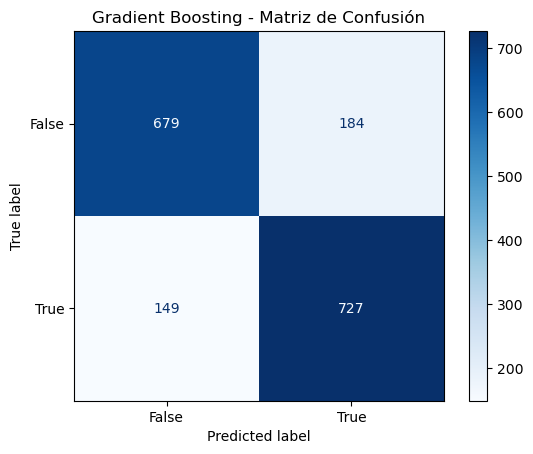


=== Reporte de Clasificación ===

Gradient Boosting:
              precision    recall  f1-score   support

       False       0.82      0.79      0.80       863
        True       0.80      0.83      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [143]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Nombres de las características seleccionadas
feature_names = ['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Num', 'HomePlanet_Europa', 'CryoSleep_True', 'Side11_S',
       'deck11_B', 'deck11_C', 'deck11_E', 'deck11_F']

# Configuración común
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1_macro']


# . Gradient Boosting Classifier con Validación Cruzada
print("\n=== Gradient Boosting Classifier ===")
gbc = GradientBoostingClassifier(
    n_estimators=200,
    random_state=42
)

# Validación Cruzada
gbc_cv_scores = cross_val_score(gbc, X_train_scaled, Y_train, cv=cv, scoring='accuracy')
print(f"Validación Cruzada (Accuracy): {gbc_cv_scores.mean():.4f} (±{gbc_cv_scores.std():.4f})")

# Entrenamiento final
gbc.fit(X_train_scaled, Y_train)

# Evaluación en Test
gbc_pred = gbc.predict(X_test_scaled)
print(f"\nAccuracy en Test: {accuracy_score(Y_test, gbc_pred):.4f}")
print(f"F1-Score (macro): {f1_score(Y_test, gbc_pred, average='macro'):.4f}")

# Importancia de Características
print("\nImportancia de características:")
for name, importance in zip(feature_names, gbc.feature_importances_):
    print(f"{name}: {importance:.4f}")

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(gbc, X_test_scaled, Y_test, 
                                    cmap='Blues', 
                                    display_labels=gbc.classes_)
plt.title("Gradient Boosting - Matriz de Confusión")
plt.show()

# Reportes de clasificación
print("\n=== Reporte de Clasificación ===")

print("\nGradient Boosting:")
print(classification_report(Y_test, gbc_pred))


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))





## 6.- Modelo con datos de prueba  
<a id='probe'></a>  
[Regreso al índice](#indi)  

### **Preprocesamiento de los Datos de Prueba**  
Para asegurar que los datos de prueba estén en el mismo formato que los datos de entrenamiento, se realizó el mismo proceso de preprocesamiento. Esto incluye:

- **Tratamiento de valores faltantes**: Se aplicaron los mismos métodos de imputación que se usaron en los datos de entrenamiento (media para las variables cuantitativas y moda para las cualitativas).  
- **Eliminación de la columna `Name`**: Al igual que con los datos de entrenamiento, se eliminó la columna `Name` para simplificar el análisis, ya que no se consideró relevante para el modelo.  
- **Transformación de la columna `Cabin`**: Se dividió la columna `Cabin` en las nuevas columnas `Deck`, `Num`, y `Side`, como se hizo con los datos de entrenamiento.  
- **Generación de variables dummy**: Se aplicó la misma transformación a las columnas categóricas, convirtiéndolas en variables dummy (por ejemplo, `HomePlanet`, `CryoSleep`, `Destination`, etc.), siguiendo el mismo enfoque utilizado en el conjunto de entrenamiento.  
- **Escalado de los datos**: Se aplicó el mismo escalado a las características del conjunto de prueba para que tuvieran el mismo rango de valores que las características del conjunto de entrenamiento.

### **Selección del Modelo Basado en los Resultados Anteriores**  
Como se observó que el **Gradient Boosting** (GBC) fue el modelo que mejor se desempeñó en la validación cruzada y en las métricas obtenidas, se continuará utilizando este modelo para hacer las predicciones sobre el conjunto de prueba. El GBC mostró un buen balance entre precisión y capacidad de generalización, por lo que se considera la mejor opción para predecir sobre los datos de prueba. 




In [146]:
import pandas as pd

# Lee el archivo
df1 = pd.read_csv("test.csv")

# Reemplazar valores faltantes en variables cuantitativas con la media
quantitative_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df1[quantitative_columns] = df1[quantitative_columns].apply(lambda x: x.fillna(x.mean()))

# Reemplazar valores faltantes en variables cualitativas con la moda
qualitative_columns = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name"]
df1[qualitative_columns] = df1[qualitative_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Verificar si hay valores faltantes después de la limpieza
missing_values = df1.isnull().sum()
print("Valores faltantes por columna después de la limpieza:")
print(missing_values)

# Eliminar la columna 'Name'
df1.drop(columns=['Name'], inplace=True)

# Verificar que se eliminaron los nulos y la columna Name
print("NULLS después de limpieza:")
print(df1.isnull().sum())
print("\nVariables restantes:")
display(df1.head(5))

print("Tamaño de la base: ", df1.shape, "\n")



dHomePlanet = pd.get_dummies(df1['HomePlanet'], drop_first=True, prefix="HomePlanet")
dCryoSleep = pd.get_dummies(df1['CryoSleep'], drop_first=True, prefix="CryoSleep")
dDestination = pd.get_dummies(df1['Destination'], drop_first=True, prefix="Destination")
dVIP = pd.get_dummies(df1['VIP'], drop_first=True, prefix="VIP")

# Procesar la columna Cabin dividiéndola en Deck, Num y Side
df1[['Deck', 'Num', 'Side']] = df1['Cabin'].str.split('/', expand=True)

# Convertir Num a numérico (algunas cabinas pueden tener valores NaN)
df1['Num'] = pd.to_numeric(df1['Num'], errors='coerce')

# Convertir Side en dummies
dSide = pd.get_dummies(df1['Side'], drop_first=True, prefix="Side")

# Convertir Deck en dummies
dDeck = pd.get_dummies(df1['Deck'], drop_first=True, prefix="Deck")

# Concatenar todas las nuevas variables al dataframe original
df1 = pd.concat([df1, dHomePlanet, dCryoSleep, dDestination, dVIP, dSide, dDeck], axis=1)

# Eliminar las columnas categóricas originales
df1.drop(["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Side", "Deck"], axis=1, inplace=True)

# Ver el resultado
print(df1.head())



Valores faltantes por columna después de la limpieza:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64
NULLS después de limpieza:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Variables restantes:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


Tamaño de la base:  (4277, 12) 

  PassengerId   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     0013_01  27.0          0.0        0.0           0.0     0.0     0.0   
1     0018_01  19.0          0.0        9.0           0.0  2823.0     0.0   
2     0019_01  31.0          0.0        0.0           0.0     0.0     0.0   
3     0021_01  38.0          0.0     6652.0           0.0   181.0   585.0   
4     0023_01  20.0         10.0        0.0         635.0     0.0     0.0   

   Num  HomePlanet_Europa  HomePlanet_Mars  ...  Destination_TRAPPIST-1e  \
0    3              False            False  ...                     True   
1    4              False            False  ...                     True   
2    0               True            False  ...                    False   
3    1               True            False  ...                     True   
4    5              False            False  ...                     True   

   VIP_True  Side_S  Deck_B  Deck_C  Deck_D  De


#### **Pasos realizados**:

1. **Preprocesamiento del conjunto de prueba (`X_test_new`)**:
   - Se seleccionan las mismas características que en el conjunto de entrenamiento utilizando la lista `feature_names`, que incluye variables numéricas y variables dummy generadas en pasos previos.
   - Los datos del conjunto de prueba se escalan utilizando el mismo escalador (`scaler`) que se aplicó a los datos de entrenamiento, garantizando que todas las características tengan el mismo rango.

2. **Evaluación con validación cruzada**:
   - Se realiza validación cruzada utilizando el modelo **Gradient Boosting Classifier** para obtener una evaluación más robusta del rendimiento del modelo. La métrica utilizada es la precisión (`accuracy`).

3. **Entrenamiento final y evaluación**:
   - El modelo se entrena con los datos de entrenamiento escalados y se evalúa sobre el conjunto de prueba utilizando el **accuracy** y el **F1-score** para obtener una visión completa del desempeño del modelo.
   - Se visualiza la **matriz de confusión** para entender cómo el modelo clasifica las distintas clases.

4. **Importancia de las características**:
   - Se imprime la **importancia de las características**, que nos indica qué variables fueron más relevantes para la predicción en el modelo GBC.

5. **Predicciones sobre el conjunto de prueba**:
   - Se realiza la predicción sobre el conjunto de prueba utilizando las mismas características preprocesadas.
   - Se crea un **DataFrame** con los `PassengerId` y las predicciones y se guarda en un archivo CSV llamado `predicciones_test.csv`.

---

### **Explicación**:

1. **Selección y Preprocesamiento de las Características**:
   - Se asegura que el conjunto de prueba tenga las mismas características que el conjunto de entrenamiento. Se seleccionan las mismas variables en `feature_names` y se aplican las mismas transformaciones de preprocesamiento: imputación de valores faltantes, generación de variables dummy, y escalado.

2. **Evaluación del Modelo (Gradient Boosting Classifier)**:
   - Se valida el rendimiento del modelo GBC mediante validación cruzada con 5 pliegues. Esto nos permite obtener una medida confiable de su rendimiento en datos no vistos.  
   - Se entrena el modelo con los datos de entrenamiento escalados y luego se evalúa sobre el conjunto de prueba utilizando la métrica de **accuracy** y **F1-score**.

3. **Matriz de Confusión y Reporte de Clasificación**:
   - La matriz de confusión nos proporciona una visualización clara de cómo el modelo está clasificando correctamente e incorrectamente las clases. Además, el reporte de clasificación nos da métricas adicionales como precisión, recall y F1-score por clase.

4. **Predicciones y Exportación**:
   - Finalmente, el modelo realiza las predicciones sobre el conjunto de prueba y las guarda en un archivo CSV, que puede ser utilizado para futuras predicciones o análisis.  


















=== Gradient Boosting Classifier ===
Validación Cruzada (Accuracy): 0.8047 (±0.0037)

Accuracy en Test: 0.8085

Importancia de características:
PassengerId: 0.0330
Age: 0.0357
RoomService: 0.0899
FoodCourt: 0.0713
ShoppingMall: 0.0322
Spa: 0.1114
VRDeck: 0.0982
Num: 0.0410
HomePlanet_Europa: 0.0513
CryoSleep_True: 0.3651
Side_S: 0.0167
Deck_B: 0.0018
Deck_C: 0.0068
Deck_E: 0.0020
Deck_F: 0.0438


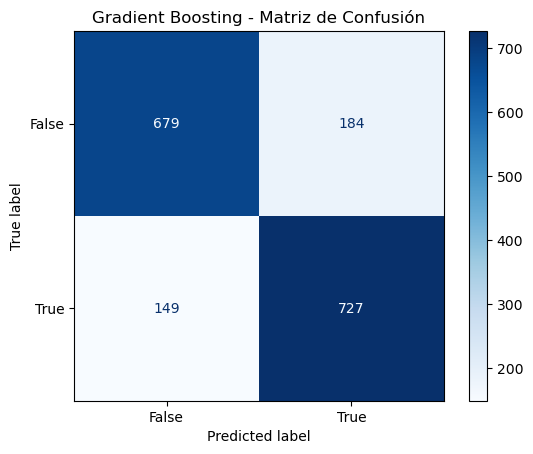


=== Reporte de Clasificación ===

Gradient Boosting:
              precision    recall  f1-score   support

       False       0.82      0.79      0.80       863
        True       0.80      0.83      0.81       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739


Predicciones guardadas en 'predicciones_test.csv':
  PassengerId  Prediction
0     0013_01        True
1     0018_01       False
2     0019_01        True
3     0021_01        True
4     0023_01        True


In [147]:
feature_names = ['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Num', 'HomePlanet_Europa', 'CryoSleep_True', 'Side_S',
       'Deck_B', 'Deck_C', 'Deck_E', 'Deck_F']

# Preprocesamiento de la base de test
X_test_new = df1[feature_names]

X_test_new_scaled = scaler.transform(X_test_new)







cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy']

# Gradient Boosting Classifier con Validación Cruzada
print("\n=== Gradient Boosting Classifier ===")
gbc = GradientBoostingClassifier(
    n_estimators=200,
    random_state=42
)

# Validación Cruzada: usando X_train_scaled y Y_train
gbc_cv_scores = cross_val_score(gbc, X_train_scaled, Y_train, cv=cv, scoring='accuracy')
print(f"Validación Cruzada (Accuracy): {gbc_cv_scores.mean():.4f} (±{gbc_cv_scores.std():.4f})")

# Entrenamiento final: usando X_train_scaled y Y_train
gbc.fit(X_train_scaled, Y_train)

# Evaluación en Test: usando X_test_scaled y Y_test
gbc_pred = gbc.predict(X_test_scaled)
print(f"\nAccuracy en Test: {accuracy_score(Y_test, gbc_pred):.4f}")


# Importancia de Características
print("\nImportancia de características:")
for name, importance in zip(feature_names, gbc.feature_importances_):
    print(f"{name}: {importance:.4f}")

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(gbc, X_test_scaled, Y_test, 
                                    cmap='Blues', 
                                    display_labels=gbc.classes_)
plt.title("Gradient Boosting - Matriz de Confusión")
plt.show()

# Reportes de clasificación
print("\n=== Reporte de Clasificación ===")
print("\nGradient Boosting:")
print(classification_report(Y_test, gbc_pred))

# Realizar las predicciones con la nueva base de test (X_test_new_scaled)
test_pred = gbc.predict(X_test_new_scaled)

# Crear un DataFrame con las predicciones y el PassengerId
predictions_df = pd.DataFrame({
    'PassengerId': df1['PassengerId'],
    'Prediction': test_pred
})

# Guardar las predicciones en un archivo CSV
predictions_df.to_csv('predicciones_test.csv', index=False)

# Mostrar las predicciones guardadas
print("\nPredicciones guardadas en 'predicciones_test.csv':")
print(predictions_df.head())



## Conclusión  
<a id='concu'></a>  
[Regreso al índice](#indi)  

Probé varios modelos y el que mejor rendimiento tuvo fue el de Gradient Boosting. Aunque la Regresión Logística logró una buena exactitud de 0.7948, tenía una sensibilidad muy alta y una especificidad baja, lo que resultaba en muchos falsos positivos. Por otro lado, el modelo LDA ofreció un buen equilibrio entre sensibilidad (0.6906) y especificidad (0.8331), pero no logró superar al Gradient Boosting. El Árbol de Decisión, antes de podarlo, tuvo una exactitud decente de 0.7832, pero después de la poda, su rendimiento cayó.

En cambio, el Gradient Boosting se destacó al lograr una exactitud de 0.8085 y un F1-score de 0.8084, lo que demuestra un rendimiento sobresaliente. Este modelo sobresale porque mejora con cada iteración, adaptándose mejor a los datos y siendo más preciso que los otros modelos. Sin duda, fue el más confiable y eficaz para este conjunto de datos.

Firma de honor: Doy mi palabra que he realizado esta actividad con integridad academica
Se uso Gpt y deep seek para hacer este proyecto
